In [14]:
import pandas as pd # Lectura de datos
import numpy as np # Operaciones con matrices
import matplotlib.pyplot as plt # Graficas
from matplotlib import rcParams # Graficas
from matplotlib.cm import rainbow # Graficas
import pickle

In [15]:
#Cargado del Dataset
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [16]:
dataset = pd.read_csv('heart.csv')

In [17]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
#Conocer los datos nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# El dataset está limpio y no le faltan valores

In [19]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
# Verificamos si los resultados estan balanceados
dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Recuento del campo objetivo')

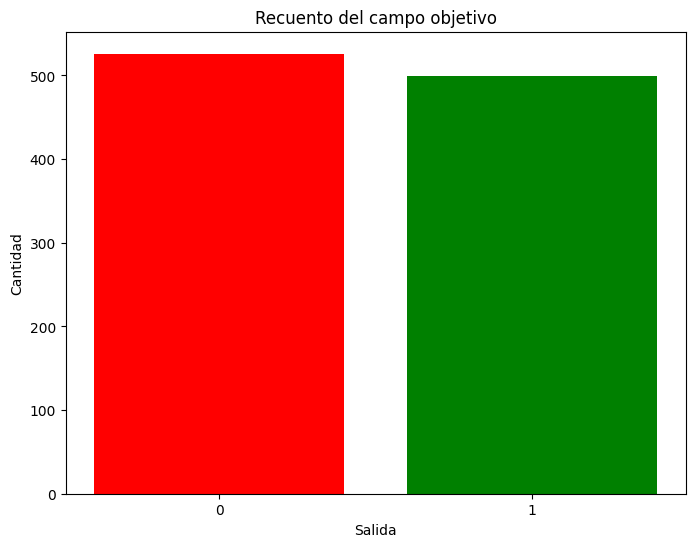

In [21]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Salida')
plt.ylabel('Cantidad')
plt.title('Recuento del campo objetivo')

# El dataset esta balanceado

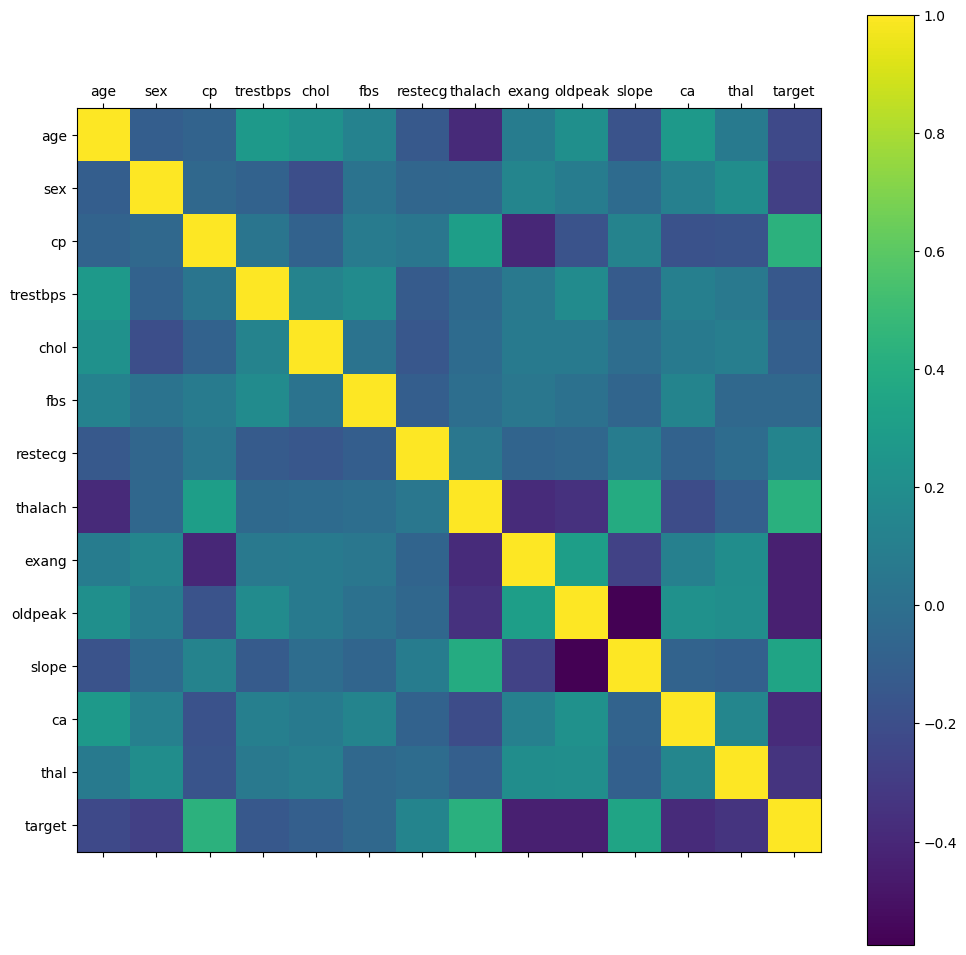

In [22]:
rcParams['figure.figsize'] = 18, 12
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

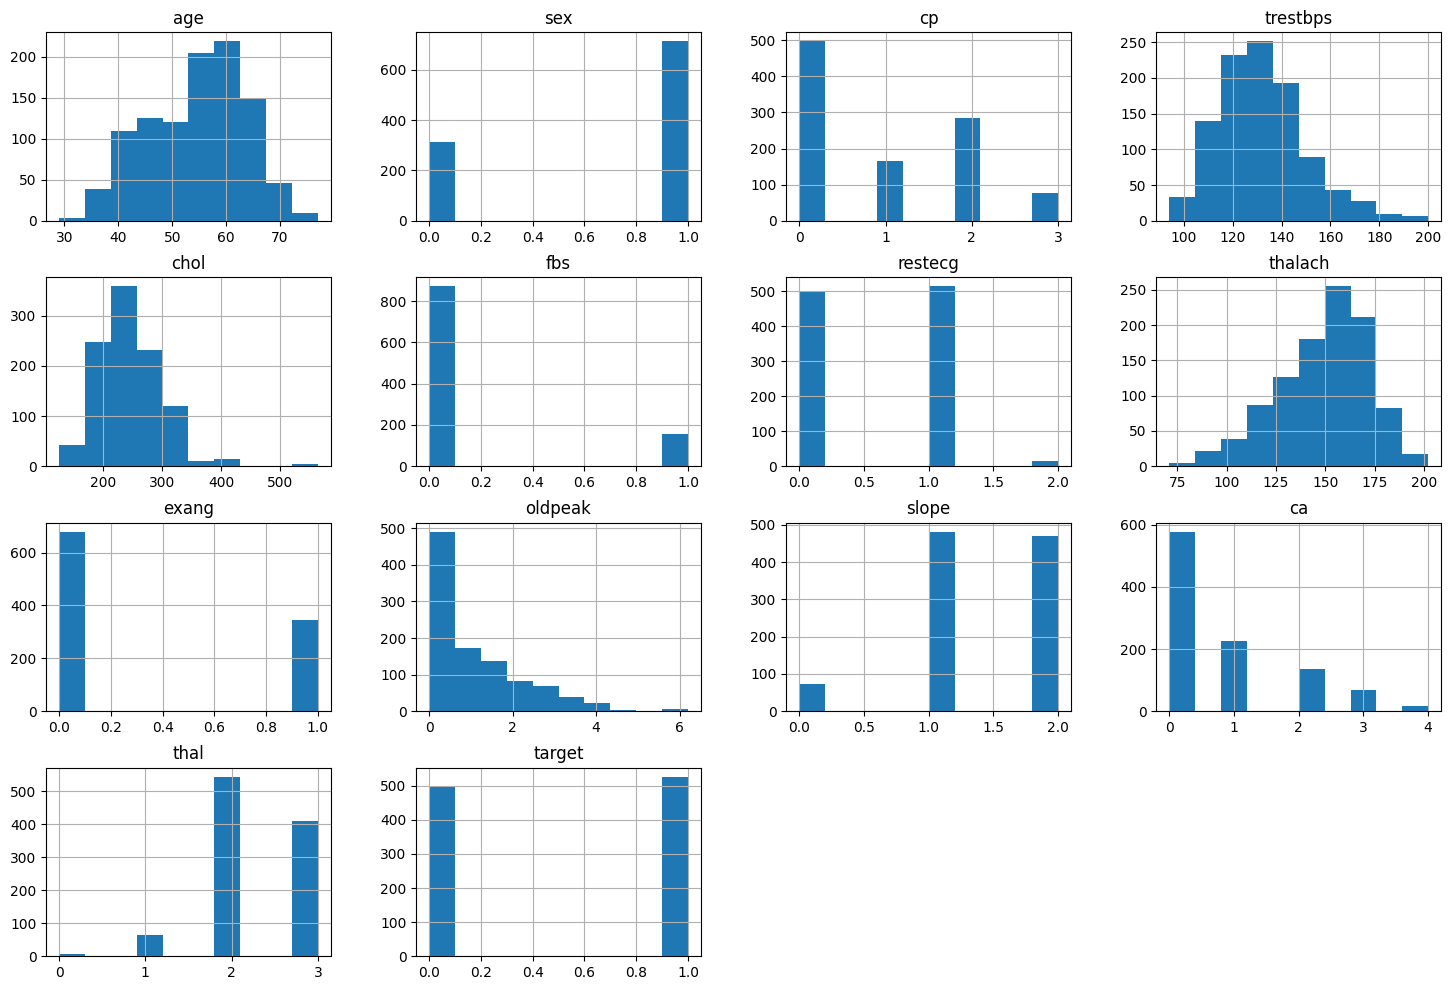

In [23]:
dataset.hist()

In [24]:
#Todos los datos son numéricos
#Vamos a transformar valores categóricos en variables ficticias
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [25]:
dataset.head(5)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
# Contendrá la variable objetivo que el modelo intentará predecir.
y = dataset['target']
# Contendrá las características que el modelo utilizará para realizar esas predicciones, después de eliminar la columna de la variable objetivo.
X = dataset.drop('target',axis=1)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

##1. K Neighbors Classifier

In [30]:
#K Neighbors Classifier
best_k = None  # Mejor K que da mejor precisión
best_accuracy = 0 # Mejor precisión obtenida
best_knn_model = None # mMdelo KNN que tiene la mejor precisión

knn_scores = [] #  Almacenará las precisiones para cada valor de k en el rango de 1 a 20.

for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)
    knn_scores.append(score)

    if score > best_accuracy:
        best_accuracy = score
        best_k = k
        best_knn_model = knn_classifier

# Imprimir el mejor valor de k y su precisión
print(f"El mejor valor de k es: {best_k}")
print(f"La precisión asociada es: {best_accuracy}")

best_knn_model.fit(X_train, y_train)
# Evaluando en el conjunto de prueba
test_accuracy = best_knn_model.score(X_test, y_test)

# Imprimir la precisión en el conjunto de prueba
print(f"Precisión en el conjunto de prueba con el mejor modelo y k: {test_accuracy}")
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

El mejor valor de k es: 1
La precisión asociada es: 0.9902597402597403
Precisión en el conjunto de prueba con el mejor modelo y k: 0.9902597402597403


KNeighborsClassifier(n_neighbors=1)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

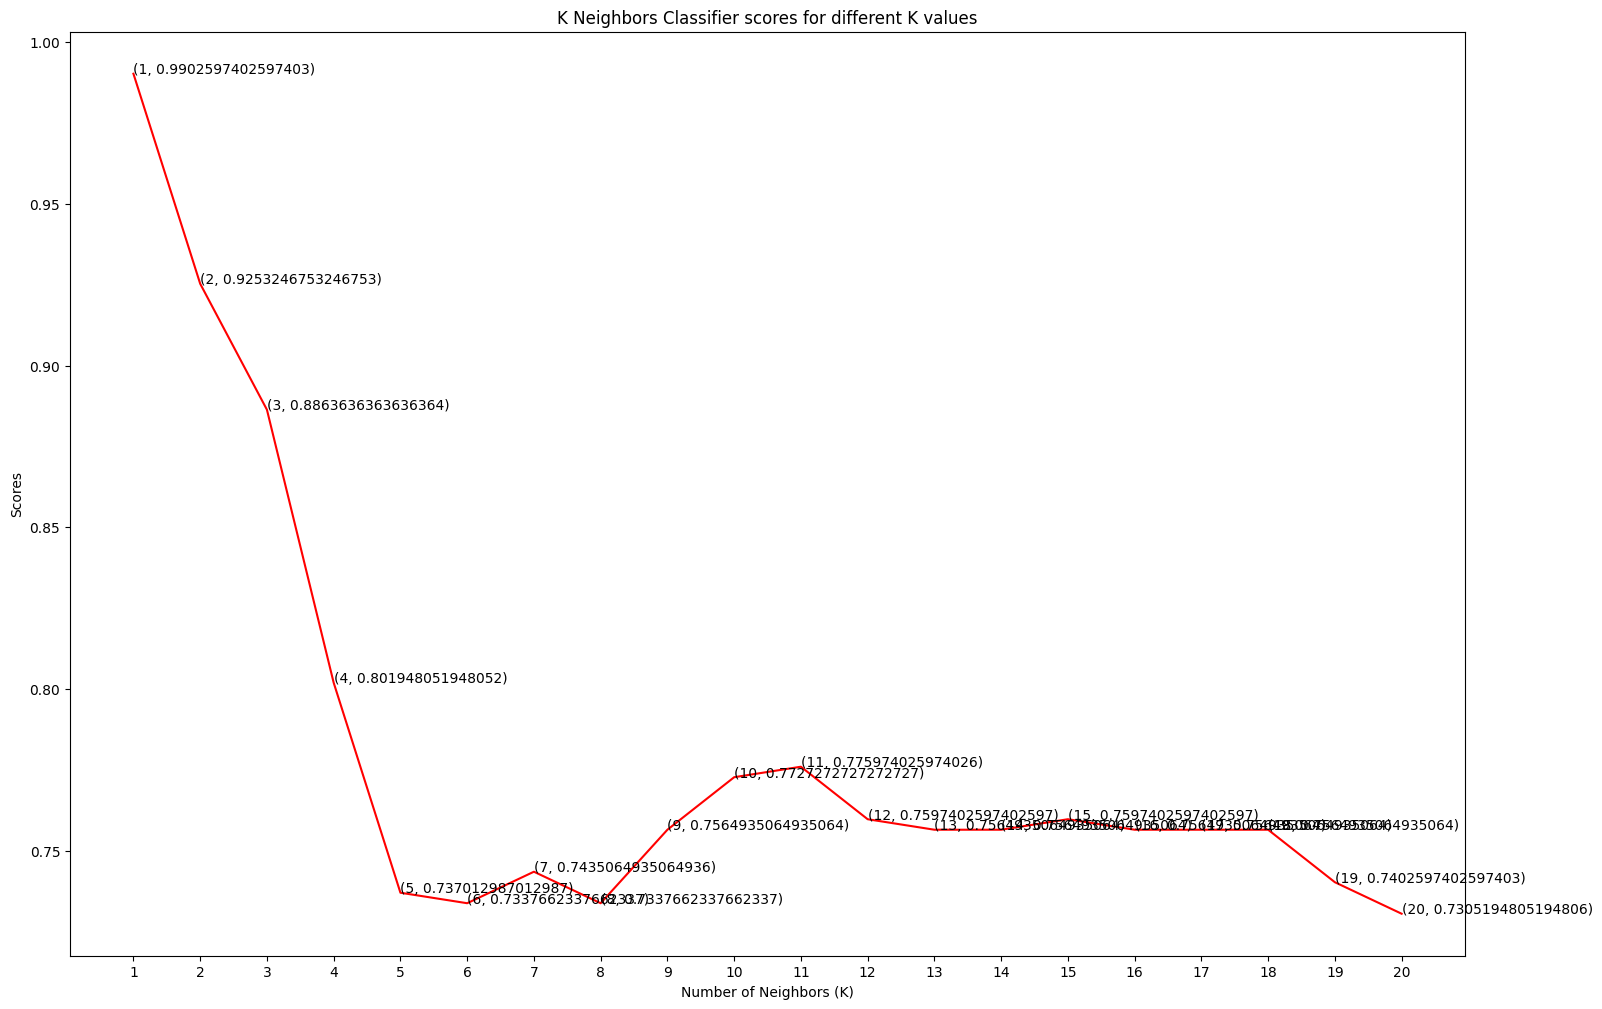

In [31]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [32]:
pickle.dump(knn_classifier, open('knn_classifier.pkl', 'wb'))

##2. Support Vector Classifier

In [33]:
# Encontrar el mejor kernel y almacenar las precisiones en un array
best_kernel = None
best_accuracy = 0
svc_scores = []  # Nuevo array para almacenar las precisiones para la grafica

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train, y_train)
    accuracy = svc_classifier.score(X_test, y_test)

    svc_scores.append(accuracy)  # Almacenar la precisión en el array

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

# Imprimir el mejor kernel y su precisión
print(f"El mejor kernel es: {best_kernel}")
print(f"La precisión asociada es: {best_accuracy}")

svc_classifier = SVC(kernel=best_kernel)
svc_classifier.fit(X_train, y_train)

El mejor kernel es: linear
La precisión asociada es: 0.8928571428571429


SVC(kernel='linear')

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

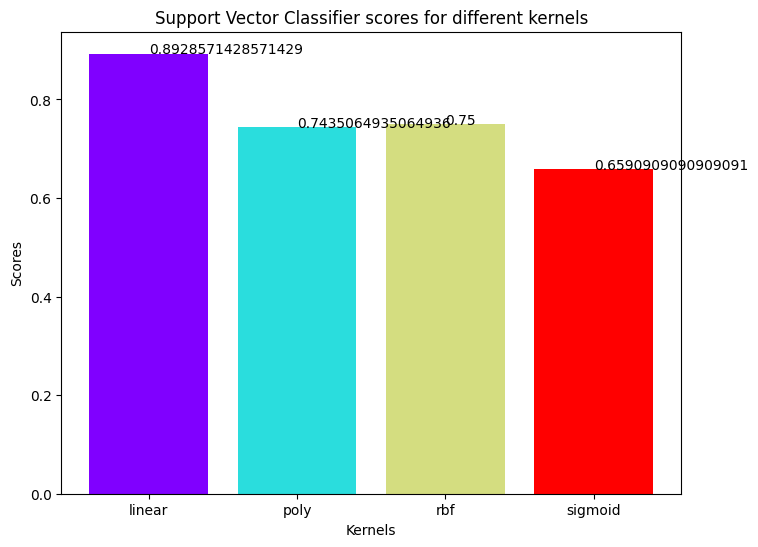

In [19]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [34]:
pickle.dump(svc_classifier, open('svc_classifier.pkl', 'wb'))

##3. Decision Tree Classifier

In [37]:
# Encontrar el mejor número de características y almacenar las precisiones en un array
best_max_features = None # Variables a considerar
best_accuracy_dt = 0
dt_scores = []  # Nuevo array para almacenar las precisiones

for max_features in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features=max_features, random_state=0)
    dt_classifier.fit(X_train, y_train)
    accuracy_dt = dt_classifier.score(X_test, y_test)

    dt_scores.append(accuracy_dt)  # Almacenar la precisión en el array

    if accuracy_dt > best_accuracy_dt:
        best_accuracy_dt = accuracy_dt
        best_max_features = max_features

# Imprimir el mejor número de características y su precisión asociada
print(f"El mejor número de características es: {best_max_features}")
print(f"La precisión asociada es: {best_accuracy_dt}")

# Entrenar el modelo Decision Tree con el mejor número de características
final_dt_model = DecisionTreeClassifier(max_features=best_max_features, random_state=0)
final_dt_model.fit(X_train, y_train)

El mejor número de características es: 2
La precisión asociada es: 1.0


DecisionTreeClassifier(max_features=2, random_state=0)

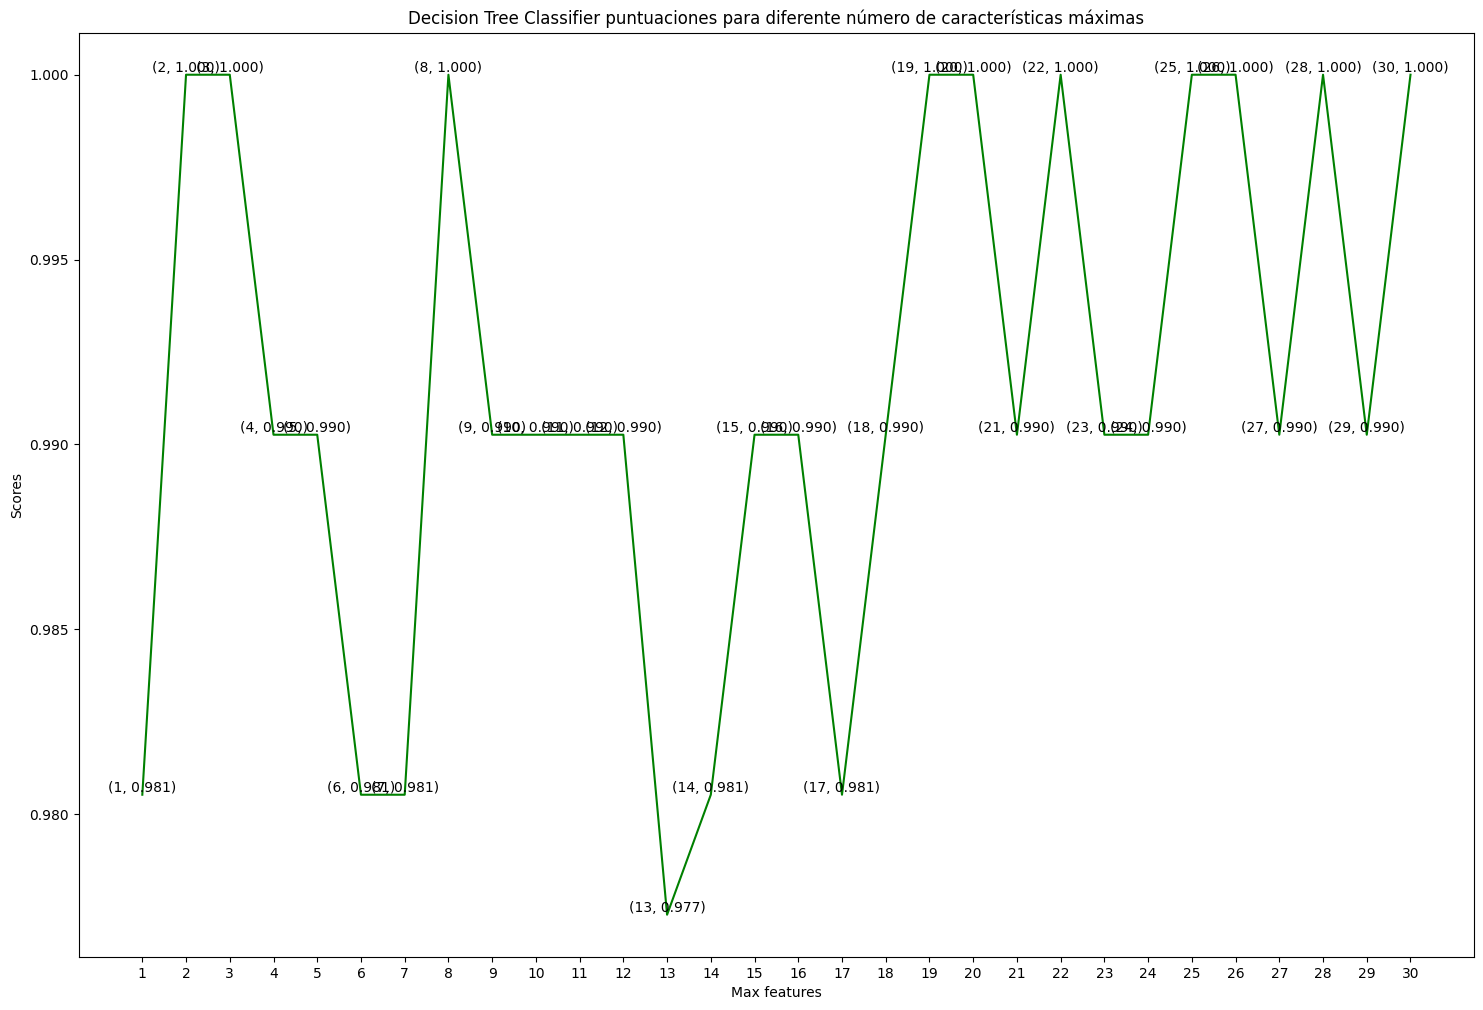

In [38]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color='green')

# Mostrar puntuaciones con tres decimales
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], f'({i}, {dt_scores[i-1]:.3f})', ha='center', va='bottom')

plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier puntuaciones para diferente número de características máximas')

plt.show()

In [45]:
pickle.dump(final_dt_model, open('final_Tree_Classifier_model.pkl', 'wb'))

##4. Random Forest Classifier

In [55]:
# Encontrar el mejor número de estimadores y almacenar las precisiones en un array
best_estimators = None
best_accuracy_rf = 0
rf_scores = []  # Nuevo array para almacenar las precisiones

estimators = [1, 2, 3, 4, 5, 6] # Número de árboles de decisión que se construirán en el bosque aleatorio

for estimator in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=estimator, random_state=0)
    rf_classifier.fit(X_train, y_train)
    accuracy_rf = rf_classifier.score(X_test, y_test)

    rf_scores.append(accuracy_rf)  # Almacenar la precisión en el array

    if accuracy_rf > best_accuracy_rf:
        best_accuracy_rf = accuracy_rf
        best_estimators = estimator

# Imprimir el mejor número de estimadores y su precisión asociada
print(f"El mejor número de estimadores es: {best_estimators}")
print(f"La precisión asociada es: {best_accuracy_rf}")

# Entrenar el modelo RandomForest con el mejor número de estimadores
final_rf_model = RandomForestClassifier(n_estimators=best_estimators, random_state=0)
final_rf_model.fit(X_train, y_train)

El mejor número de estimadores es: 5
La precisión asociada es: 1.0


RandomForestClassifier(n_estimators=5, random_state=0)

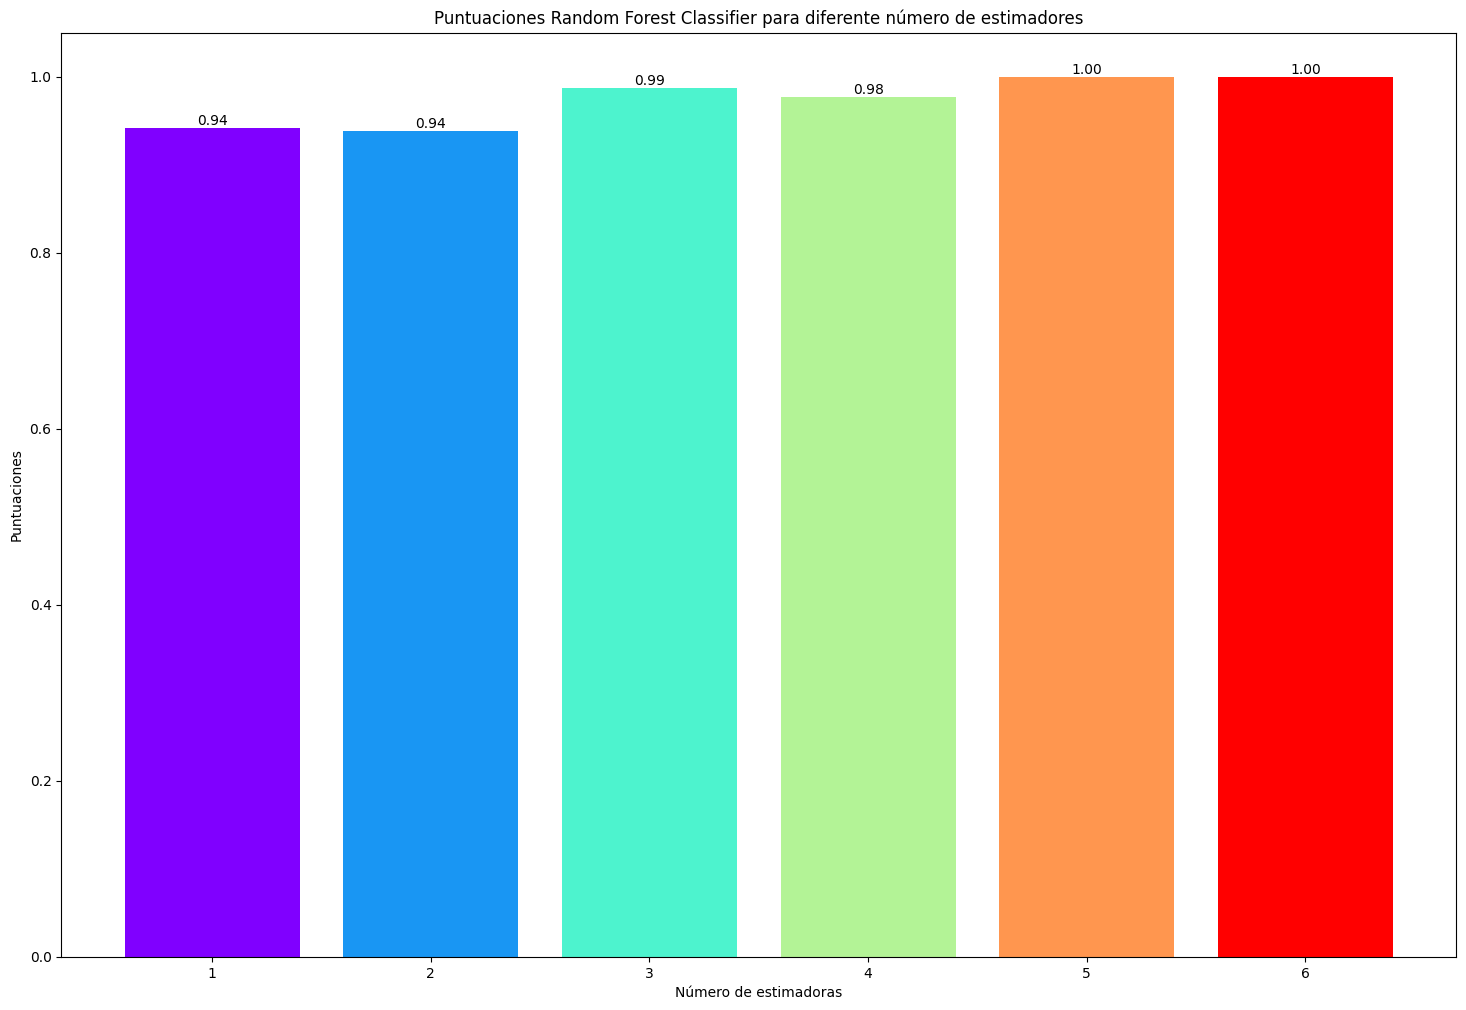

In [56]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width=0.8)

# Mostrar puntuaciones con dos decimales
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], f'{rf_scores[i]:.2f}', ha='center', va='bottom')

plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel('Número de estimadoras')
plt.ylabel('Puntuaciones')
plt.title('Puntuaciones Random Forest Classifier para diferente número de estimadores')

plt.show()

In [46]:
pickle.dump(final_rf_model, open('final_Random_Forest_model.pkl', 'wb'))

In [48]:
forest=RandomForestClassifier(n_estimators=20, random_state=12,max_depth=6)
forest.fit(X_train, y_train)
pickle.dump(forest, open('Random_forest_model.pkl', 'wb'))